# Exercise of Data Visualization

## Download the example data (Optional)

In this practice, we can choose to use the European air quality forecast dataset from [CAMS (Copernicus Atmosphere Monitoring Service)](https://atmosphere.copernicus.eu/). You can download this [CAMS 2.0 Product Portfolio](https://atmosphere.copernicus.eu/sites/default/files/custom-uploads/UW%20Denmark/CAMS2.0%20Product%20Portfolio.xlsx) to see more information on the products. You can follow the instructions below to download the example dataset using python.

## Prepare before download

To download the data, we will use CDS API. The Copernicus website has provided a practical [instruction](https://ads.atmosphere.copernicus.eu/api-how-to), please follow the steps. 

The steps are also described below:

1. Register an account in ADS [here](https://ads.atmosphere.copernicus.eu/user/register?destination=%2F%23!%2Fhome).
2. [Login](https://ads.atmosphere.copernicus.eu/user/login?destination=%2F%23!%2Fhome) to the ADS using your account.
3. Copy the code [displayed](https://ads.atmosphere.copernicus.eu/api-how-to) after login (refresh the page may help) and paste to th file ~/.cdsapirc 
4. Install 

### A quick fix if you fail to download

If you fail to download the data or you don't want to spend time to figure out how to download yourself. We have a already downloaded dataset for you to start the next part.

## Read the data

The file is in netcdf format. We will use `xarray` package to read the file.

Import the necessary packages:

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
ds = xr.open_dataset('../CAMS_ensemble_20240110.nc')
print(ds)

<xarray.Dataset>
Dimensions:     (longitude: 88, latitude: 41, level: 1, time: 97)
Coordinates:
  * longitude   (longitude) float32 7.15 7.25 7.35 7.45 ... 15.65 15.75 15.85
  * latitude    (latitude) float32 58.15 58.05 57.95 57.85 ... 54.35 54.25 54.15
  * level       (level) float32 0.0
  * time        (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
Data variables:
    co_conc     (time, level, latitude, longitude) float32 ...
    dust        (time, level, latitude, longitude) float32 ...
    ectot_conc  (time, level, latitude, longitude) float32 ...
    nh3_conc    (time, level, latitude, longitude) float32 ...
    no2_conc    (time, level, latitude, longitude) float32 ...
    no_conc     (time, level, latitude, longitude) float32 ...
    o3_conc     (time, level, latitude, longitude) float32 ...
    pans_conc   (time, level, latitude, longitude) float32 ...
    pm10_conc   (time, level, latitude, longitude) float32 ...
    pm2p5_conc  (time, level, latitude, longitude

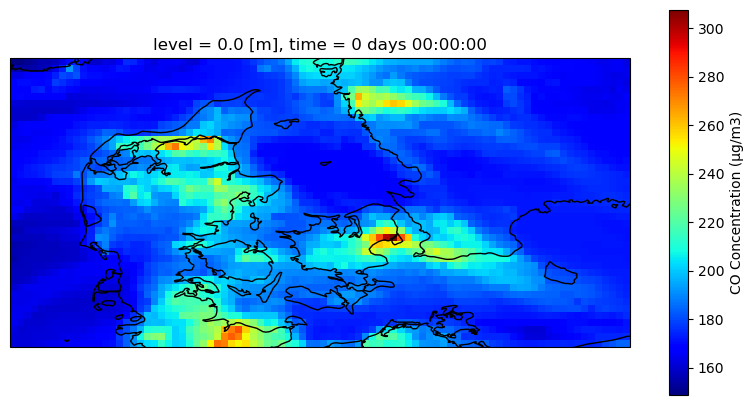

In [16]:
# plot the data in map
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())  # create a GeoAxes object with Plate Carree projection
qm = ds['co_conc'].isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(),cmap='jet')  # plot the data on the GeoAxes object
qm.colorbar.set_label('CO Concentration (\u03bcg/m3)')
ax.coastlines()  # add coastlines
plt.show()